In [86]:
#Import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
API_KEY = "****************************"



In [ ]:
#Install full-fred module
%pip install full-fred

### Create function to reformat Fred data

In [151]:
# Create function to Relabel & Organize Datasets from full_fred Module
def reformat_fred_df(dataframe, value_col_rename=str):
    """Returns reformated Dataframe with Date and Renamed Value Column.
    Converts Date to datetime64 & Value to float. 
    (Does not accept strings in Value Columns*! 
    Replace str values to Nan in 'value' columns.)

    **Parameters**

    :dataframe --> Takes raw dataframe from .get_series_df method 
    :value_col_rename --> Renames 'value' column to proper Value name 
    e.g. pd.rename(columns={'value': value_col_rename})
    """

    #Rename columns
    dataframe = dataframe.rename(
        columns={
            "date": "Date",
            "value": value_col_rename,
        }
    )

    #Grab Columns needed for Dataframe
    dataframe = dataframe[["Date", value_col_rename]]

    #Change 'Date' column to datetime64 type
    dataframe["Date"] = pd.to_datetime(dataframe["Date"])

    #Change 'Value' column to float
    try:
        dataframe[value_col_rename] = dataframe[value_col_rename].astype(float)
    except ValueError:
        print("Value Error! Please convert string value to Nan in value column.")

    #Return dataframe
    return dataframe

# Searching for Series using Full Fred library
##### Full Fred Documentation <https://github.com/7astro7/full_fred>


In [33]:
from full_fred.fred import Fred
fred = Fred('api_key.txt')

# Check api key
fred.get_api_key_file()

'api_key.txt'

In [159]:
# Search through Fred database for series 
# #Storing in variable to avoid running output
home_sales_search = fred.search_for_series(search_words=["home sales"])


# 1)Open in text editor to go through data 
# 2)Command + f to search through text editor
# 3)Grab the 'id' value for the dataset you want
# 4)For example - if we want the id from the first dataset
# id = 'MSPUS' 

## Median Home Sale Price Data (1963 - Present)

In [160]:
# Use the .get_series_df method and enter the 'id' from the desired dataset
median_home_price = fred.get_series_df('MSPUS')
median_home_price

,realtime_start,realtime_end,date,value
0,2023-11-10,2023-11-10,1963-01-01,17800
1,2023-11-10,2023-11-10,1963-04-01,18000
2,2023-11-10,2023-11-10,1963-07-01,17900
3,2023-11-10,2023-11-10,1963-10-01,18500
4,2023-11-10,2023-11-10,1964-01-01,18500
...,...,...,...,...
238,2023-11-10,2023-11-10,2022-07-01,468000.0
239,2023-11-10,2023-11-10,2022-10-01,479500.0
240,2023-11-10,2023-11-10,2023-01-01,429000.0
241,2023-11-10,2023-11-10,2023-04-01,418500.0


In [161]:
# Reformat Dataframe
median_home_price_df = reformat_fred_df(median_home_price, "Median Home Sale Price")

# Display Dataframe
median_home_price_df

,Date,Median Home Sale Price
0,1963-01-01,17800.0
1,1963-04-01,18000.0
2,1963-07-01,17900.0
3,1963-10-01,18500.0
4,1964-01-01,18500.0
...,...,...
238,2022-07-01,468000.0
239,2022-10-01,479500.0
240,2023-01-01,429000.0
241,2023-04-01,418500.0


## 30 Year Mortgage Rate Data (1971 - Present)

In [110]:
interest_rate_search = fred.search_for_series(search_words=["interest rate"])


In [152]:
mortgage_30 = fred.get_series_df("MORTGAGE30US")

## Data sourced from '30-Year Fixed Rate Mortgage Average in the United States'

In [133]:
# Reformat Dataframe
mortgage_30_df = reformat_fred_df(mortgage_30, "30 Year Fixed Mortgage Rate")

# Display Dataframe
mortgage_30_df.head()

,Date,30 Year Fixed Mortgage Rate
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [ ]:
# Check datatypes
mortgage_30_df.dtypes

## 15 Year Mortgage Rate Data (1991 - Present)

In [153]:
mortgage_15 = fred.get_series_df("MORTGAGE15US")

## Data sourced from '15-Year Fixed Rate Mortgage Average in the United States'

In [154]:
# Reformat Dataframe
mortgage_15_df = reformat_fred_df(mortgage_15, "15 Year Fixed Mortgage Rate")

# Display Dataframe
mortgage_15_df.head()

,Date,15 Year Fixed Mortgage Rate
0,1991-08-30,8.77
1,1991-09-06,8.79
2,1991-09-13,8.68
3,1991-09-20,8.62
4,1991-09-27,8.59


In [ ]:
# Check datatypes
mortgage_15_df.dtypes

## Home Price Index Data (1987 - Present)

In [117]:
home_price_search = fred.search_for_series(search_words=["home price"])

In [128]:
home_price_index = fred.get_series_df("CSUSHPINSA")
home_price_index

## Data sourced from S&P/Case-Shiller U.S. National Home Price Index

,realtime_start,realtime_end,date,value
0,2023-11-10,2023-11-10,1975-01-01,.
1,2023-11-10,2023-11-10,1975-02-01,.
2,2023-11-10,2023-11-10,1975-03-01,.
3,2023-11-10,2023-11-10,1975-04-01,.
4,2023-11-10,2023-11-10,1975-05-01,.
...,...,...,...,...
579,2023-11-10,2023-11-10,2023-04-01,301.469
580,2023-11-10,2023-11-10,2023-05-01,305.427
581,2023-11-10,2023-11-10,2023-06-01,308.307
582,2023-11-10,2023-11-10,2023-07-01,310.16200000000003


In [129]:
# Change string values in value column to Nan values
home_price_index["value"] = home_price_index['value'].replace(".", np.nan)

In [131]:
# Reformat Dataframe
home_price_index_df = reformat_fred_df(home_price_index, "Home Price Index")

# Display Dataframe
home_price_index_df

,Date,Home Price Index
0,1975-01-01,NaN
1,1975-02-01,NaN
2,1975-03-01,NaN
3,1975-04-01,NaN
4,1975-05-01,NaN
...,...,...
579,2023-04-01,301.469
580,2023-05-01,305.427
581,2023-06-01,308.307
582,2023-07-01,310.162


In [ ]:
# Check datatype
home_price_index_df.dtypes

## Household Debt to GDP Data (2005 - Present)

In [15]:
gdp_search = fred.search_for_series(search_words=["GDP"])

In [155]:
household_debt_to_gdp = fred.get_series_df("HDTGPDUSQ163N")

## Data sourced from  "Household Debt to GDP for United States", International Monetary Fund

In [156]:
# Reformat Dataframe
household_debt_to_gdp_df = reformat_fred_df(household_debt_to_gdp, "Household Debt to GDP")

# Display Dataframe
household_debt_to_gdp_df.head()

,Date,Household Debt to GDP
0,2005-01-01,86.795348
1,2005-04-01,89.366533
2,2005-07-01,92.138275
3,2005-10-01,94.436722
4,2006-01-01,91.736689


# Test Merging Dataframes and Visualization

In [141]:
# Merging Median Home Prices and Household Debt to GDP
# Only merging as a test since these two have overlapping 'Date' values

med_home_price_and_gdp = pd.merge(median_home_price_df, household_debt_to_gdp_df, how="inner", on="Date")

In [162]:
#Display dataframe
med_home_price_and_gdp

,Date,Median Home Sale Price,Household Debt to GDP
0,2005-01-01,232500.0,86.795348
1,2005-04-01,233700.0,89.366533
2,2005-07-01,236400.0,92.138275
3,2005-10-01,243600.0,94.436722
4,2006-01-01,247700.0,91.736689
...,...,...,...
69,2022-04-01,449300.0,76.140050
70,2022-07-01,468000.0,77.407977
71,2022-10-01,479500.0,78.279285
72,2023-01-01,429000.0,74.355033


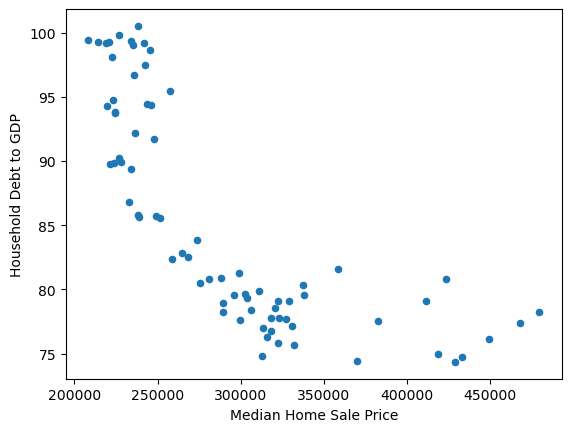

In [163]:
# Create Scatter Plot
med_home_price_and_gdp.plot(kind="scatter", x="Median Home Sale Price", y= "Household Debt to GDP")

# Show Plot
plt.show()

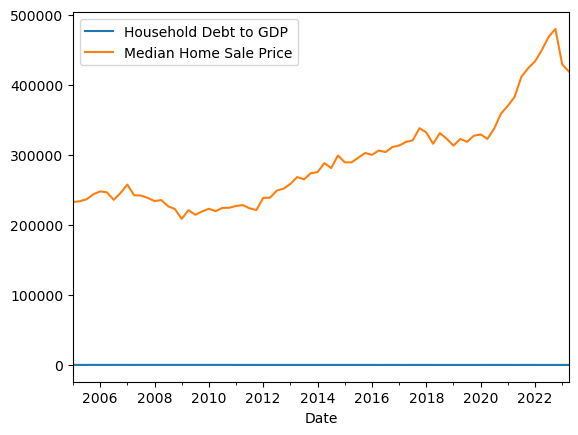

In [168]:
# Create line graph (Household debt line will be close to 0 due to difference in values)
med_home_price_and_gdp.plot(kind="line", y=["Household Debt to GDP", "Median Home Sale Price"], x="Date")

# Show plot
plt.show()